In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


## 1. Import fashion mnist data

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 2. Explore the data

In [4]:
train_images.shape  #60,000 images with each image having 28 X 28 pixels

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape   #10,000 images with each image having 28 x 28 pixel

(10000, 28, 28)

In [8]:
len(test_labels)

10000

## 3. Preprocess the data

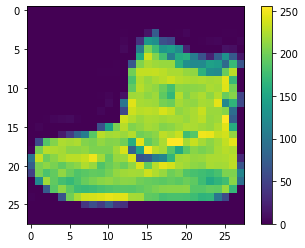

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
#Preprocess the images
train_images = train_images / 255.0

test_images = test_images / 255.0

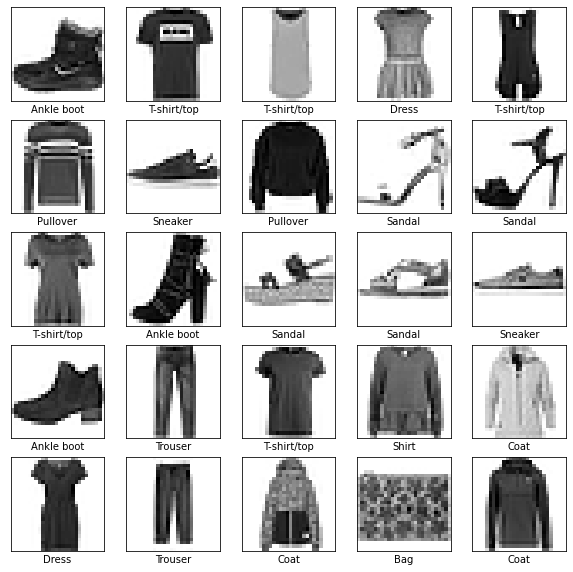

In [11]:
#Display the first 25 images from training set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

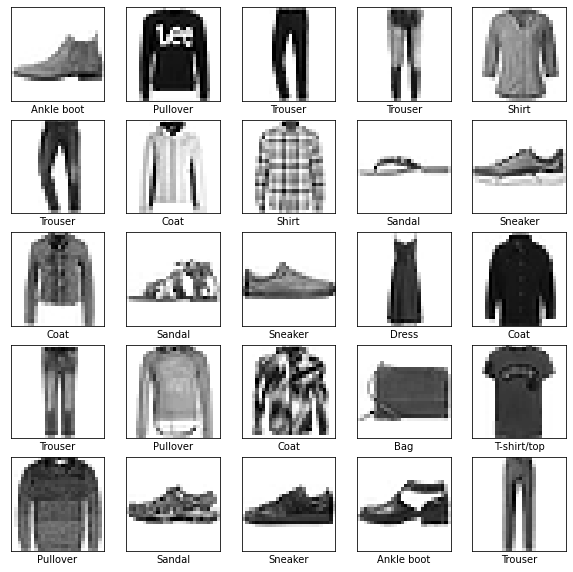

In [12]:
#Display first 25 images from testing set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i]])
plt.show()

## 4. Build the model

#### 4.1 Set up the layers

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),   #Convert the 60,000 x 28 x 28 to 60,000 x 784
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

#### 4.2 Compile the model

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## 5. Train the Model

#### 5.1 Feed the model

In [15]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4990 - accuracy: 0.8256
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3791 - accuracy: 0.8625
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3419 - accuracy: 0.8754
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3186 - accuracy: 0.8841
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3009 - accuracy: 0.8894
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2863 - accuracy: 0.8946
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2745 - accuracy: 0.8991
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2625 - accuracy: 0.9021
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2535 - accuracy: 0.9052
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.245

#### 5.2 Evaluate accuracy

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3432 - accuracy: 0.8743

Test accuracy: 0.8743000030517578


Model is overfitting!!

#### 5.3 Make predictions

In [17]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [18]:
predictions = probability_model.predict(test_images)

In [19]:
predictions[0]

array([1.2663570e-06, 1.1984826e-08, 7.2245491e-08, 6.9705948e-09,
       2.8994569e-05, 2.6998220e-03, 1.3627812e-04, 9.5426198e-03,
       3.2251601e-06, 9.8758775e-01], dtype=float32)

In [20]:
np.argmax(predictions[0])

9

So, the model is most confident that this image is an ankle boot, or class_names[9]. Examining the test label shows that this classification is correct:


In [21]:
test_labels[0]

9

In [22]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

#### 5.4 Verify predictions

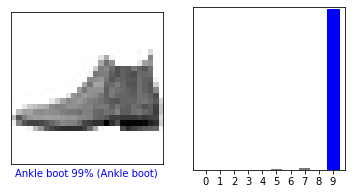

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

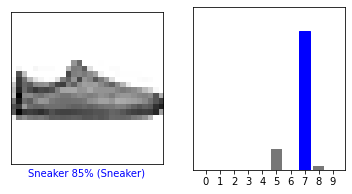

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

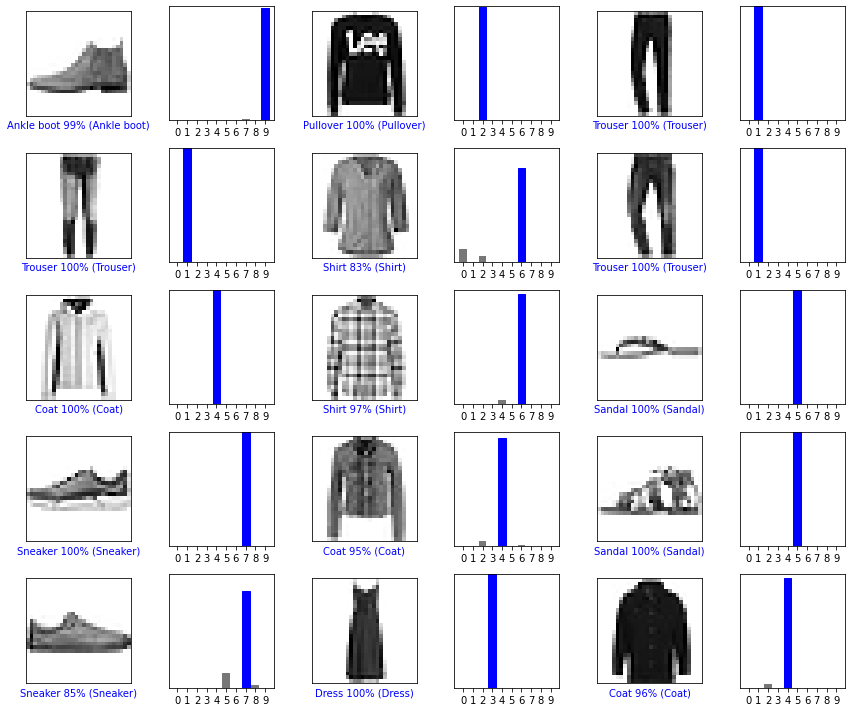

In [25]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## 6. Use the trained model

In [26]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [27]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [28]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[1.1559219e-04 1.3474130e-11 9.9612695e-01 5.1938707e-11 3.5801211e-03
  5.8467269e-14 1.7746387e-04 1.4020533e-18 4.0499506e-09 1.4636598e-12]]


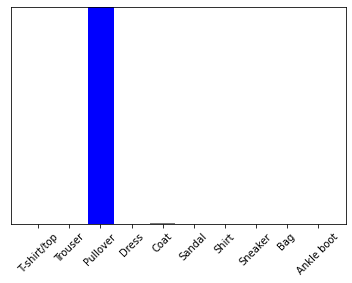

In [29]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [30]:
np.argmax(predictions_single[0])

2